# Final - the relationship between traffic accident death rates and population in Washington State

***Introduction***

Traffic accidents are important issue, causing many deaths every year. I want to study how population affects traffic accident death rates in Washington State. Understanding this relationship can help improve safety, city planning, and use resources better.

Find high percentage regions in Washington where traffic deaths happen more often.
Understandwhatw factors like age, alcohol use, race, and timing (day or night, seasons) influence accident ratess.

***Data Collection***

Data source: 

1. NHTSA-traffic data, and alcohol data (https://crashstats.nhtsa.dot.gov/#!/PublicationList/7)

3. CENSUS - Population data WA (https://www.census.gov/)

***Data preparation***

Upload all file for doing the data clean

## Population data:

Import panda library

In [10]:
import pandas as pd

Step 1: File Paths, List of file paths for population data from 2012 to 2021

In [11]:
file_paths = [
    '2012_population_data.csv',
    '2013_population_data.csv',
    '2014_population_data.csv',
    '2015_population_data.csv',
    '2016_population_data.csv',
    '2017_population_data.csv',
    '2018_population_data.csv',
    '2019_population_data.csv',
    '2020_population_data.csv',
    '2021_population_data.csv'
]

Step 2:Initialize an empty DataFrame for combined data, extract and read CSV files

In [12]:
combined_data = pd.DataFrame()

for file_path in file_paths:
    year = file_path.split('_')[0]
    df = pd.read_csv(file_path)
    total_population_row = df.iloc[0]
    total_population_row = total_population_row.filter(like="Total!!Estimate")
    counties = [col.split("!!")[0] for col in total_population_row.index]
    year_data = pd.DataFrame({
        "County": counties,
        "Population": total_population_row.values,
        "Year": year
    })
    combined_data = pd.concat([combined_data, year_data], ignore_index=True)

step3: Save to a new CSV file

In [13]:
output_path = "cleaned_population_data_wa.csv"
combined_data.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to cleaned_population_data_wa.csv


## Traffic data:

Step 1: Load Data

In [14]:
traffic_file = "WA_traffic_rawData.csv"
try:
    traffic_data = pd.read_csv(traffic_file)
    print("Traffic data loaded successfully.")
except Exception as e:
    print(f"Error loading traffic data: {e}")
    traffic_data = None


Traffic data loaded successfully.


Step 2: Clean Columns, Rename columns, and Reshape Data

In [15]:
if traffic_data is not None:
    traffic_data.columns = traffic_data.columns.str.replace(" ", "_").str.lower()
    traffic_data.rename(columns={'county': 'county_name'}, inplace=True)
    traffic_data_long = traffic_data.melt(
        id_vars=["county_name"], 
        var_name="year", 
        value_name="traffic_count"
    )
    traffic_data_long.dropna(subset=["traffic_count"], inplace=True)

Step 3: Save Cleaned Data

In [16]:
    cleaned_traffic_file = "cleaned_traffic_data_wa.csv"
    traffic_data_long.to_csv(cleaned_traffic_file, index=False)
    print(f"Cleaned traffic data saved to {cleaned_traffic_file}")

Cleaned traffic data saved to cleaned_traffic_data_wa.csv


After clean data, I got two new dataset:

"cleaned_population_data_wa.csv"

"cleaned_traffic_data_wa.csv






## Data analysis

### Plot Total Population Change in Washington State
After obtaining two cleaned datasets, one for population and another for traffic, I will now focus on using the cleaned population dataset to create a plot. This plot will visualize the population change from 2012 to 2022, helping to identify trends and patterns over this period.

step 1: import library of the matplotlib

In [17]:
import matplotlib.pyplot as plt

step 2: Load the data, filter data for the total population, and convert year and population to integers for plotting

In [18]:
file_path = 'cleaned_population_data_wa.csv'
data = pd.read_csv(file_path)
total_population_data = data[data['County'] == 'Washington'].copy()
total_population_data['Year'] = total_population_data['Year'].astype(int)
total_population_data['Population'] = total_population_data['Population'].str.replace(',', '').astype(int)

step 3: Plot the data

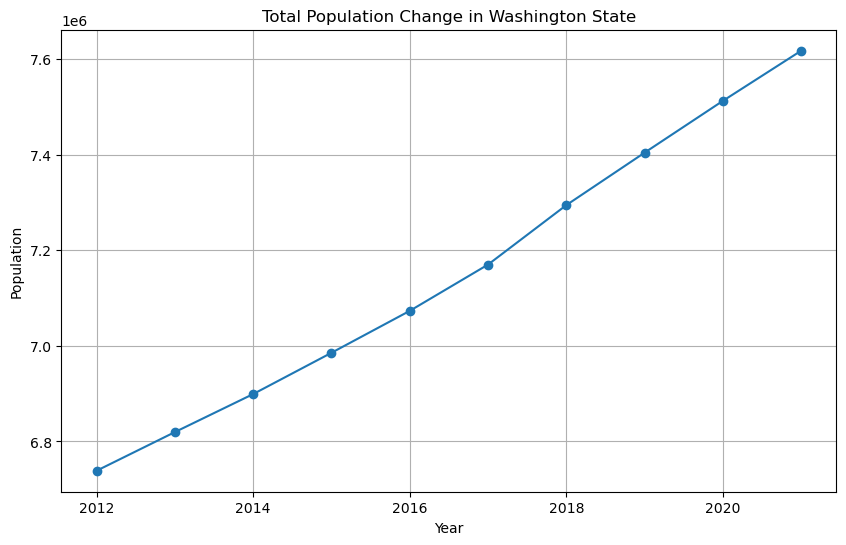

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(total_population_data['Year'], total_population_data['Population'], marker='o', linestyle='-')
plt.title('Total Population Change in Washington State')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

Plot 1 Result: From the plot, we can observe that the population has steadily increased over these 10 years, showing a consistent upward trend. This indicates a stable growth pattern in WA.

### Total Traffic Count Change Over the Years

Now, using the cleaned traffic dataset, I will create a plot to visualize the traffic data. This will help us understand traffic patterns and trends over the same period, providing insights into changes in traffic volume from 2012 to 2022.

Step 1 Load the data

In [20]:
file_path = 'cleaned_traffic_data_wa.csv' 
data = pd.read_csv(file_path)

Step 2 Group data by year and sum traffic counts

In [21]:
total_traffic_by_year = data.groupby('year')['traffic_count'].sum()

Step 3 Plot the total traffic count over the years

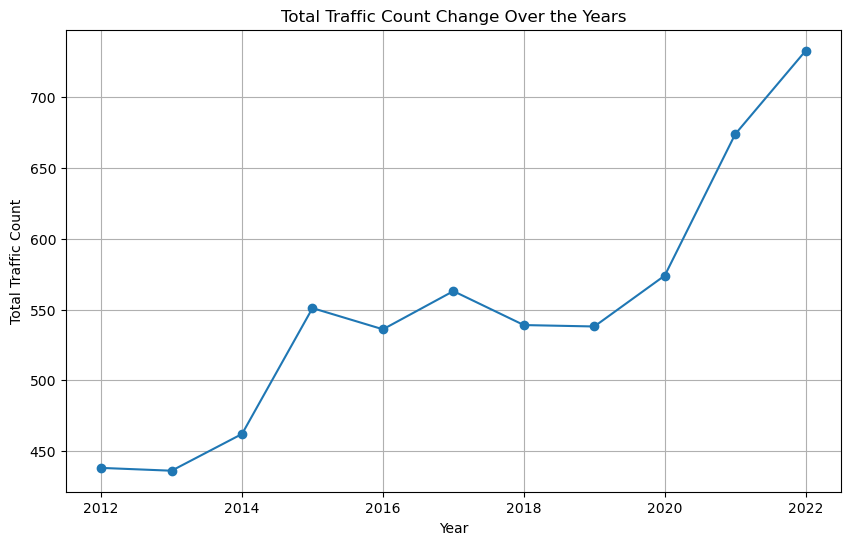

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(total_traffic_by_year.index, total_traffic_by_year.values, marker='o', linestyle='-')
plt.title('Total Traffic Count Change Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Traffic Count')
plt.grid(True)
plt.show()

Plot 2 Result: The plot shows a significant increase in traffic counts from 2013 to 2015, as well as from 2019 to 2022. During other periods, traffic counts experienced either small increases or decreases. Overall, the plot does not demonstrate a strong correlation with the population trends observed in the population plot.

### Comparison of Population and Traffic Count from 2012-2022

To better compare and visually analyze the relationship between population and traffic counts, I combined the two datasets into a single plot. This allows for a more direct and intuitive comparison of the trends.

Step 1 Load the population and traffic data

In [26]:
population_file = 'cleaned_population_data_wa.csv'  
traffic_file = 'cleaned_traffic_data_wa.csv'

population_data = pd.read_csv(population_file)
traffic_data = pd.read_csv(traffic_file)

Step 2 Filter total population data and Group traffic data by year and sum

In [27]:
total_population_data = population_data[population_data['County'] == 'Washington'].copy()
total_population_data['Year'] = total_population_data['Year'].astype(int)
total_population_data['Population'] = total_population_data['Population'].str.replace(',', '').astype(int)
total_traffic_by_year = traffic_data.groupby('year')['traffic_count'].sum().reset_index()

merged_data = pd.merge(
    total_population_data[['Year', 'Population']],
    total_traffic_by_year,
    left_on='Year',
    right_on='year'
)

Step 3 make the plot

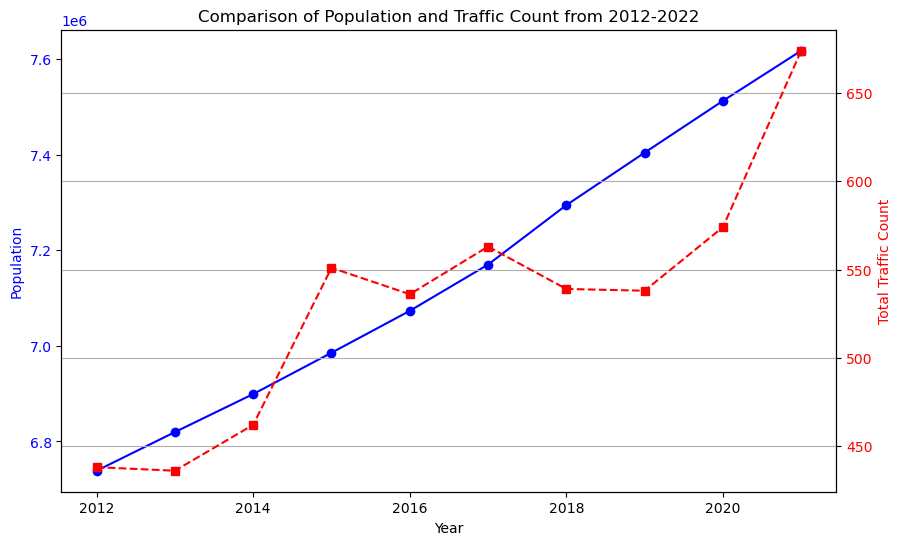

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='blue')
ax1.plot(merged_data['Year'], merged_data['Population'], marker='o', linestyle='-', color='blue', label='Population')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.set_ylabel('Total Traffic Count', color='red')
ax2.plot(merged_data['Year'], merged_data['traffic_count'], marker='s', linestyle='--', color='red', label='Traffic Count')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Population and Traffic Count from 2012-2022')
plt.grid(True)

plt.show()

Plot 3 Result: The comparison plot provides a clearer view of the population and traffic side by side. From this, it is evident that there is no strong relationship between population growth and traffic counts over 2012 - 2022

### WA Population by County in 2012 - 2022

Now, to explore the relationship between population and traffic from a different perspective, I will compare each county's population with its corresponding traffic data. This approach allows us to identify interesting patterns or outliers at the county level. As the first step, we will create a bar plot showing the population of each county.


Step 1 Load the population data

In [29]:
file_path = 'cleaned_population_data_wa.csv'
data = pd.read_csv(file_path)
specific_year = 2012
population_by_county = data[(data['Year'] == specific_year) & (data['County'] != 'Washington')].copy()

Step 2 Remove commas and convert Population to integers and Sort counties by population for better visualization

In [30]:
population_by_county['Population'] = population_by_county['Population'].str.replace(',', '').astype(int)
population_by_county = population_by_county.sort_values(by='Population', ascending=False)

Step 3 Plot the data

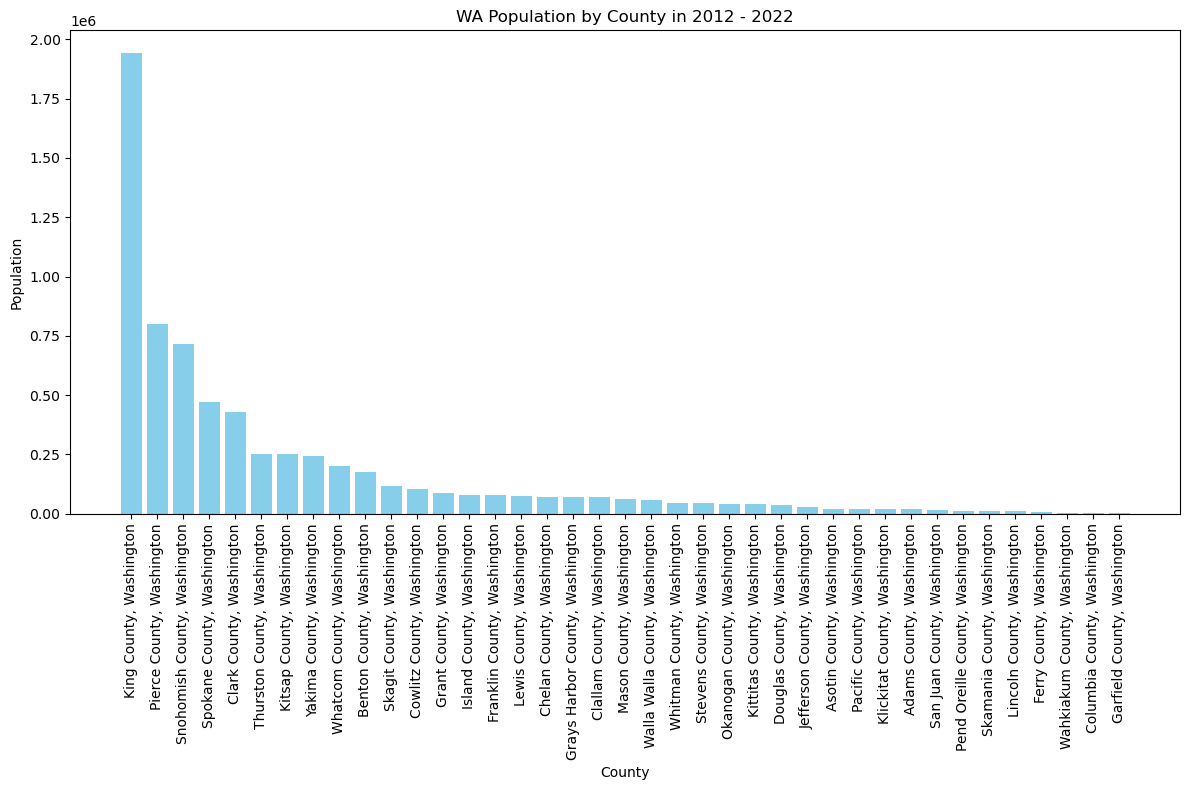

In [31]:
plt.figure(figsize=(12, 8))
plt.bar(population_by_county['County'], population_by_county['Population'], color='skyblue')
plt.title(f'WA Population by County in 2012 - 2022')
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

Plot 4 Result: The bar plot of each county's population shows that the top three counties with the highest populations are King, Pierce, and Snohomish.

### Traffic Count by County in 2012 - 2022 WA
Now, let’s create a bar plot showing the traffic count for each county. This will help us compare the traffic data alongside the population data and uncover any notable patterns or differences.

Step 1 Load the traffic data

In [36]:
file_path = 'cleaned_traffic_data_wa.csv'
data = pd.read_csv(file_path)
specific_year = 2012
traffic_by_county = data[data['year'] == specific_year].copy()

Step 2 Sort counties by traffic count for better visualization

In [37]:
traffic_by_county = traffic_by_county.sort_values(by='traffic_count', ascending=False)

Step 3 Plot the data

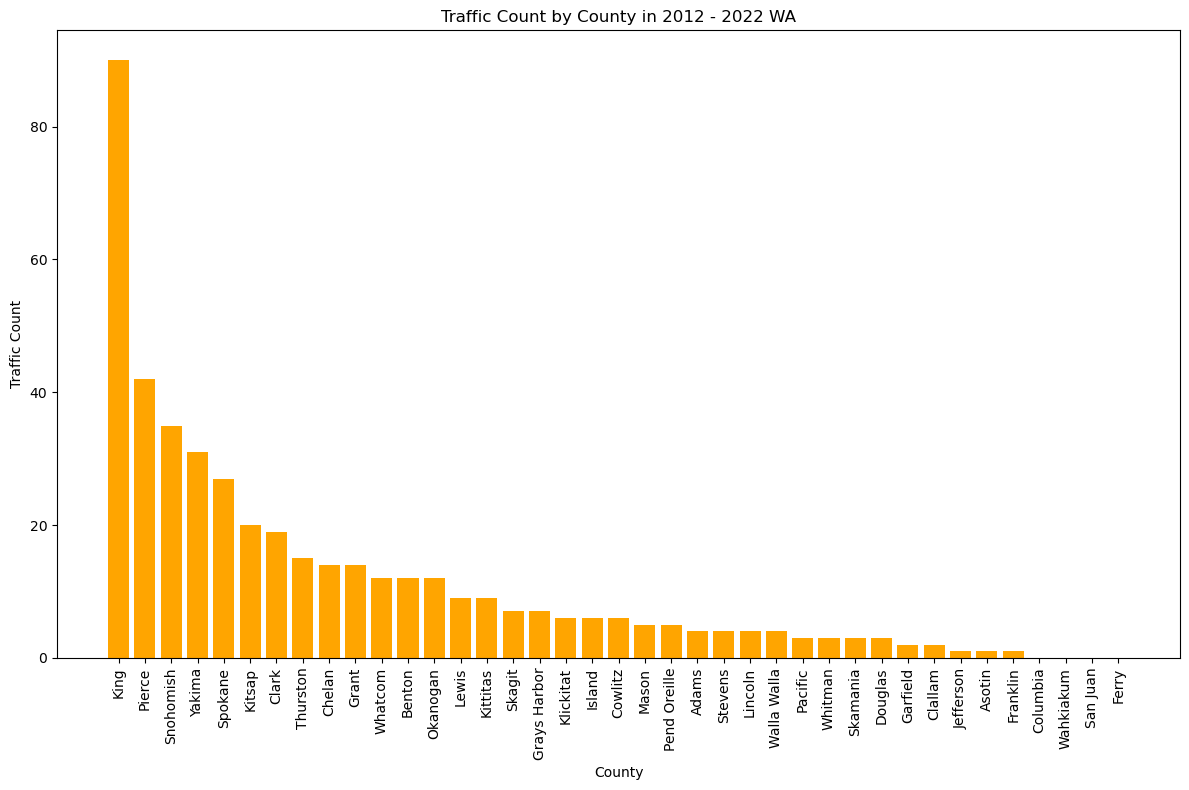

In [38]:
plt.figure(figsize=(12, 8))
plt.bar(traffic_by_county['county_name'], traffic_by_county['traffic_count'], color='orange')
plt.title(f'Traffic Count by County in 2012 - 2022 WA')
plt.xlabel('County')
plt.ylabel('Traffic Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Plot 5 Result: From this bar plot, we can see that the top three counties in terms of traffic counts are the same as those for population: King, Pierce, and Snohomish.

### Comparison of Total Population and Traffic Counts by County (2012-2022)
Combine the population and traffic bar plots into a single plot. This will allow us to directly compare each county's population and traffic counts side by side, making it easier to identify any correlations or discrepancies between the two datasets.

Step 1 import library

In [40]:
import numpy as np

Step 2 Load the population and traffic data, and Clean and prepare the population data and traffic data

In [41]:
population_file = 'cleaned_population_data_wa.csv' 
traffic_file = 'cleaned_traffic_data_wa.csv'    

population_data = pd.read_csv(population_file)
traffic_data = pd.read_csv(traffic_file)

population_data['County'] = population_data['County'].str.strip().str.replace(" County, Washington", "")
traffic_data['County'] = traffic_data['county_name'].str.strip()
population_data['Population'] = population_data['Population'].str.replace(',', '').astype(int)
population_data = population_data[['County', 'Population']]

traffic_data = traffic_data.rename(columns={'traffic_count': 'Traffic'})

population_agg = population_data.groupby('County')['Population'].sum().reset_index()
traffic_agg = traffic_data.groupby('County')['Traffic'].sum().reset_index()

merged_data = pd.merge(population_agg, traffic_agg, on='County', how='inner')

Step 3 Scale traffic values for visualization, because for the better vasulazation make the traffic count data time 10000

In [42]:
scaling_factor = 10000
merged_data['Scaled Traffic'] = merged_data['Traffic'] * scaling_factor

Step 4 Plot combined bar plot

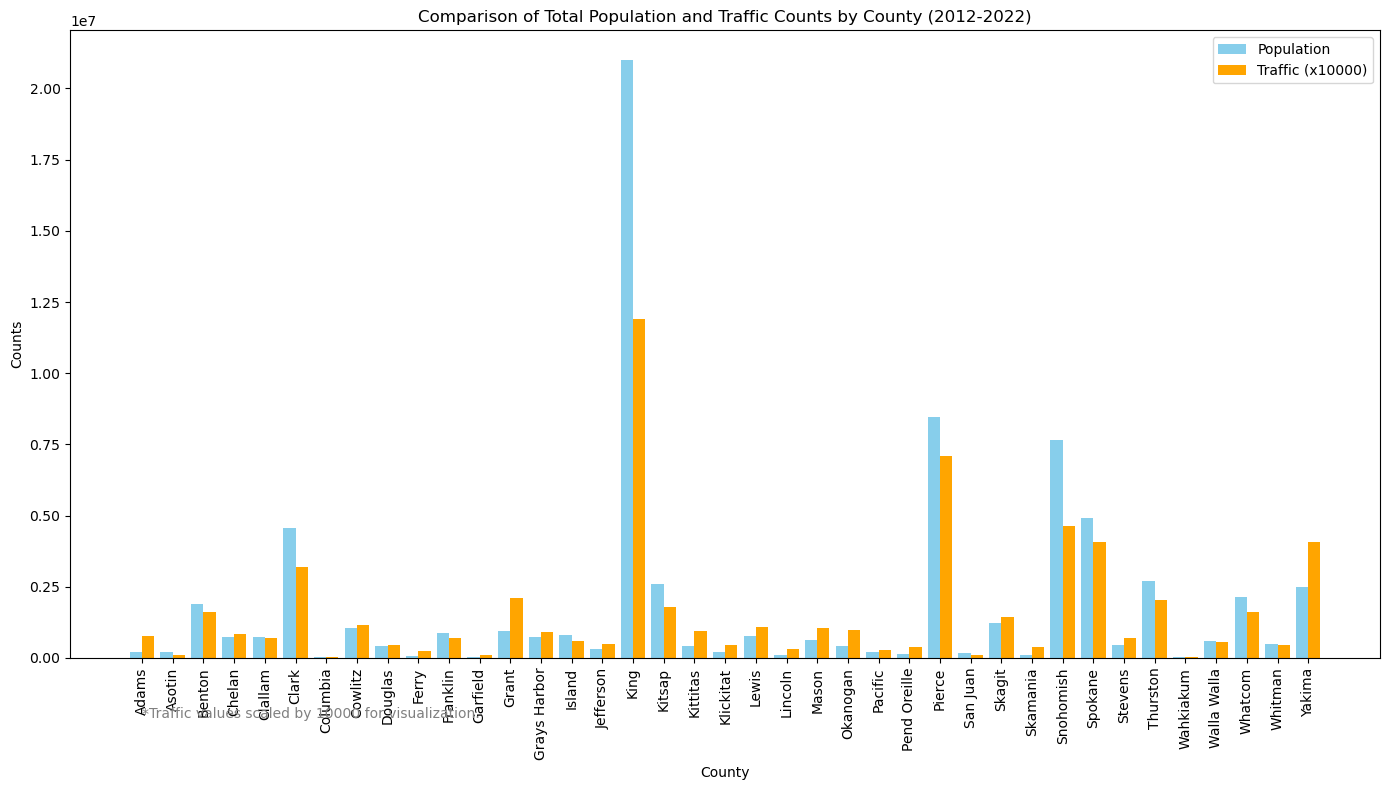

In [43]:
x = np.arange(len(merged_data['County']))
width = 0.4

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, merged_data['Population'], width, label='Population', color='skyblue')
bars2 = ax.bar(x + width/2, merged_data['Scaled Traffic'], width, label=f'Traffic (x{scaling_factor})', color='orange')
ax.set_xlabel('County')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Total Population and Traffic Counts by County (2012-2022)')
ax.set_xticks(x)
ax.set_xticklabels(merged_data['County'], rotation=90)
ax.legend()

plt.text(0, -max(merged_data['Population']) * 0.1, f'*Traffic values scaled by {scaling_factor} for visualization.', fontsize=10, color='gray')

plt.tight_layout()
plt.show()


Plot 6 Result: From this combined plot, we can observe that counties such as King, Pierce, Snohomish, Yakima, Clark, Spokane, and Whatcom have the highest traffic counts, which align with their high population levels. This suggests that population size has a significant impact on traffic counts in these counties.

### Accidents per 100,000 People by County

I want to determine whether higher traffic counts are caused by a larger population resulting in more accidents per capita or simply due to a larger base population. To investigate this, I will create a table and plot that calculates the number of traffic incidents per 10,000 people for each county and visualize it with a plot.

Step 1 Load the population and traffic data

In [44]:
population_file = 'cleaned_population_data_wa.csv'  
traffic_file = 'cleaned_traffic_data_wa.csv'       

population_data = pd.read_csv(population_file)
traffic_data = pd.read_csv(traffic_file)

Step 2 Clean and prepare the population data and traffic data

In [45]:
population_data['County'] = population_data['County'].str.strip().str.replace(" County, Washington", "")
traffic_data['County'] = traffic_data['county_name'].str.strip()

population_data['Population'] = population_data['Population'].str.replace(',', '').astype(int)

population_agg = population_data.groupby('County')['Population'].sum().reset_index()
traffic_agg = traffic_data.groupby('County')['traffic_count'].sum().reset_index()

merged_data = pd.merge(population_agg, traffic_agg, left_on='County', right_on='County', how='inner')
merged_data.rename(columns={'traffic_count': 'Traffic'}, inplace=True)

Step 3 Calculate accidents per 100,000 people

In [46]:
merged_data['Accidents per 100,000'] = (merged_data['Traffic'] / merged_data['Population']) * 100000
mean_rate = merged_data['Accidents per 100,000'].mean()
std_dev = merged_data['Accidents per 100,000'].std()

Step 4 Classify counties as high, low, or normal rates

In [47]:
merged_data['Rate Classification'] = merged_data['Accidents per 100,000'].apply(
    lambda x: 'High' if x > mean_rate + std_dev else ('Low' if x < mean_rate - std_dev else 'Normal')
)

Step 5 show plot

          County  Population  Traffic  Accidents per 100,000  \
0          Adams      192871       76              39.404576   
1         Asotin      221506       10               4.514550   
2         Benton     1896399      161               8.489775   
3         Chelan      750455       84              11.193209   
4        Clallam      737059       69               9.361530   
5          Clark     4567758      319               6.983733   
6       Columbia       40004        4               9.999000   
7        Cowlitz     1044848      115              11.006386   
8        Douglas      405180       44              10.859371   
9          Ferry       75718       25              33.017248   
10      Franklin      880063       70               7.953976   
11      Garfield       22412       11              49.080850   
12         Grant      933449      210              22.497212   
13  Grays Harbor      723456       90              12.440287   
14        Island      810856       60   

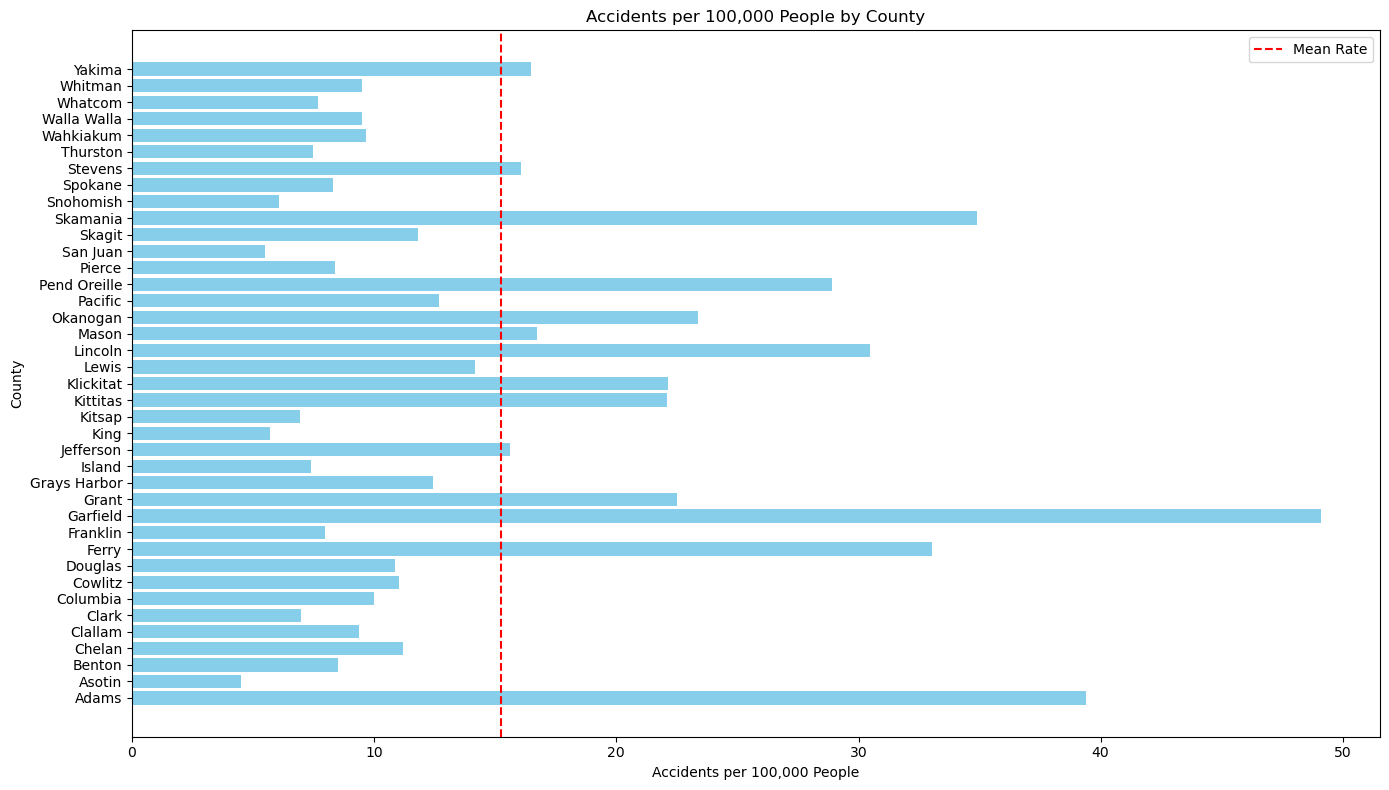

In [48]:
print(merged_data)

plt.figure(figsize=(14, 8))
plt.barh(merged_data['County'], merged_data['Accidents per 100,000'], color='skyblue')
plt.axvline(mean_rate, color='red', linestyle='--', label='Mean Rate')
plt.title('Accidents per 100,000 People by County')
plt.xlabel('Accidents per 100,000 People')
plt.ylabel('County')
plt.legend()
plt.tight_layout()
plt.show()

The analysis shows that:

High Accident Rate Counties: Counties lik**e Adams, Ferry, Garfield, Lincoln, Pend Oreille, and Skaman**ia have high accident rates per 100,000 people. 

Low Accident Rate Counties: Asotin County has a much lower accident rate than others, suggesting effective traffic management or other factors that reduce accidents.

Normal Accident Rate Counties: Most counties fall in the "Normal" range, meaning their accident rates are proportional to their population sizes.

High Population Areas: Counties with large populations, like King, Snohomish, and Pierce, do not have unusually high accident rates. Their higher accident numbers are due to more people, not higher risk.

## Scientific Abstract

This research analyzed the relationship between population size and traffic counts across counties from 2012 to 2022. The key findings are:
1. Population and Traffic Trends:

    Population steadily increased over the years, while traffic counts showed more variation, with notable increases in 2013–2015 and 2019–2022.
    High-population counties like King, Pierce, and Snohomish also have the highest traffic counts.

2. Normalized Traffic Rates:

    When looking at traffic per 10,000 people, smaller counties like Ferry and Pend Oreille had higher rates than expected, suggesting other factors might influence traffic.

### Implications:
Population Influence: Larger populations generally lead to higher traffic counts, but other factors, like road infrastructure and travel behavior, play a role.
Policy: Smaller counties with high traffic rates should focus on traffic safety and infrastructure improvements.

### Summary:
Population size impacts traffic counts, but it’s not the only factor. Understanding these dynamics can help in planning better infrastructure and managing traffic more effectively.